In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Importing the data

In [2]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Plotting a data-point

In [4]:
import matplotlib.pyplot as plt

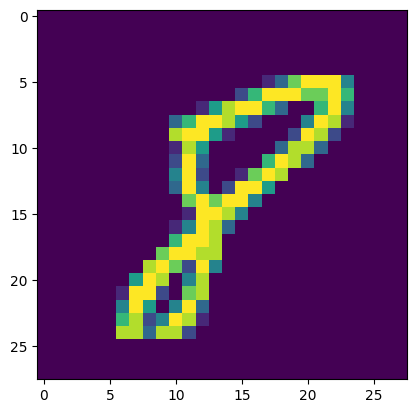

In [5]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

# Taking the data in X and the label in y

In [6]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

# Doing train_test_split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape

(33600, 784)

# Using KNN without PCA

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn=KNeighborsClassifier()

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
import time
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

9.013499021530151


***Observation-> The time to evaluate KNN without PCA is approx 10 seconds***

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

***Observation-> The accuracy is approx 96.5%***

# Using KNN with PCA

### For using PCA, we have to normalize the data so using StandardScaler class

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [15]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Using the top 100 p components

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

In [17]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [18]:
X_train_trf.shape

(33600, 100)

In [19]:
knn=KNeighborsClassifier()

In [20]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [21]:

import time
start=time.time()
y_pred=knn.predict(X_test_trf)
print(time.time()-start)

1.5253698825836182


***Observation-> The time taken to predict this time is approx 2 seconds***

In [22]:
accuracy_score(y_test,y_pred)

0.9542857142857143

***Observation-> The accuracy decreases, this time it is 95.4%***

# Now evaluating that for which value of p in p components the accuracy is best

In [23]:
for i in range(1,785):
    pca=PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    
    knn=KNeighborsClassifier()
    
    knn.fit(X_train_trf, y_train)
    
    y_pred=knn.predict(X_test_trf)
    
    print(i, "->", accuracy_score(y_test,y_pred))

1 -> 0.25761904761904764
2 -> 0.32392857142857145
3 -> 0.5103571428571428
4 -> 0.6663095238095238
5 -> 0.7376190476190476
6 -> 0.8223809523809524
7 -> 0.843452380952381
8 -> 0.8721428571428571
9 -> 0.8860714285714286
10 -> 0.906547619047619
11 -> 0.911547619047619
12 -> 0.9184523809523809
13 -> 0.9284523809523809
14 -> 0.9351190476190476
15 -> 0.9389285714285714
16 -> 0.9380952380952381
17 -> 0.9397619047619048
18 -> 0.9410714285714286
19 -> 0.9428571428571428
20 -> 0.9433333333333334
21 -> 0.9436904761904762
22 -> 0.944047619047619
23 -> 0.9448809523809524
24 -> 0.9448809523809524
25 -> 0.9480952380952381
26 -> 0.9470238095238095
27 -> 0.9473809523809524
28 -> 0.9479761904761905
29 -> 0.9482142857142857
30 -> 0.9486904761904762
31 -> 0.9516666666666667
32 -> 0.9515476190476191
33 -> 0.9504761904761905
34 -> 0.9498809523809524
35 -> 0.9510714285714286
36 -> 0.9525
37 -> 0.9515476190476191
38 -> 0.9529761904761904
39 -> 0.9539285714285715
40 -> 0.9526190476190476
41 -> 0.951785714285714

***Observation-> The p value '95' has the greatest accuracy and after '687' value of p the accuracy is same***

# Now after transforming there will a graph plotting also

### First for 2D

In [24]:
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [25]:
X_train_trf

array([[-2.71862463, -0.48978   ],
       [-0.67701413, -6.75305245],
       [-3.03322672,  6.50930347],
       ...,
       [ 2.14885813,  0.78074415],
       [ 1.05958896,  0.94749629],
       [17.70257088,  1.96227354]])

In [26]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=X_train_trf[:,0],
               y=X_train_trf[:,1],
               color=y_train_trf,
               color_discrete_sequence=px.colors.qualitative.G10
              )
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


### Now for 3D

In [27]:
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [28]:
X_train_trf

array([[-2.7186256 , -0.48977166,  1.13528552],
       [-0.67695596, -6.75373957, -2.33557713],
       [-3.03324878,  6.50971151,  7.49167511],
       ...,
       [ 2.14884868,  0.78077743, -0.7469933 ],
       [ 1.05958438,  0.94800617,  3.94939249],
       [17.70257501,  1.96174226, -4.94309618]])

In [29]:
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(df,x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],
                 color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Eigen values of these 3 p components

In [30]:
pca.explained_variance_

array([40.67111198, 29.17023394, 26.74459611])

# Those eigen vectors

In [31]:
pca.components_

array([[-1.70922739e-18,  2.44247779e-18, -3.10564362e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.01059412e-17,  3.37738464e-17, -8.24160681e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.81639293e-17,  4.64326514e-17, -2.57966107e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [32]:
pca.components_.shape

(3, 784)

In [33]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

# Now checking that for what value of p components, the variance explained in 90%

In [34]:
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [35]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

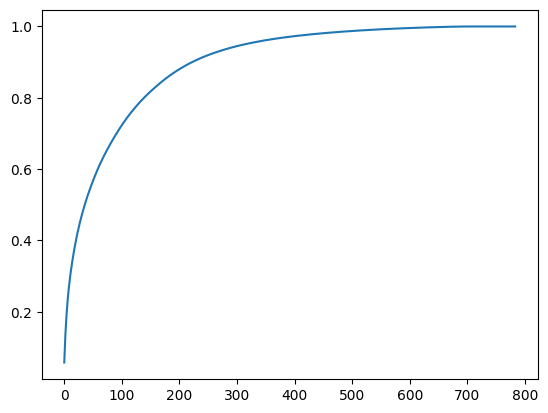

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

***Observation-> So from graph, it is clearly seen that approx 220 is that value for which 90% of variance is explained***